In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
imagePaths = 'dataset/'
label_list = ['Pandan', 'Pepaya']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(100, 3072)

<h3>3. Data Preprocessing</h3>

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan' 'Pandan'
 'Pandan' 'Pandan' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya'
 'Pepaya' 'Pepaya' 'Pepaya' 'Pepaya']


In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


<h3>4. Split Dataset</h3>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 3072)
Ukuran data test = (20, 3072)


<h3>5. Build ANN Architecture</h3>

In [10]:
# buat ANN dengan arsitektur input layer (3072) - hidden layer (512) - hidden layer (1024) - output layer (3)
model = Sequential()
model.add(Dense(512, input_shape=(3072,), activation="relu"))
model.add(Dense(2000, activation="relu"))
model.add(Dense(len(label_list), activation="softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1026000   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 4002      
Total params: 2,603,378
Trainable params: 2,603,378
Non-trainable params: 0
_________________________________________________________________


In [12]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [13]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [14]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 107ms/step - loss: 2.0251 - accuracy: 0.4250 - val_loss: 0.8089 - val_accuracy: 0.6000
Epoch 2/100
3/3 [==============================] - 0s 28ms/step - loss: 0.8472 - accuracy: 0.5250 - val_loss: 0.6390 - val_accuracy: 0.6000
Epoch 3/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6679 - accuracy: 0.6125 - val_loss: 0.6578 - val_accuracy: 0.4000
Epoch 4/100
3/3 [==============================] - 0s 29ms/step - loss: 0.6414 - accuracy: 0.4750 - val_loss: 0.5992 - val_accuracy: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 30ms/step - loss: 0.6040 - accuracy: 0.7250 - val_loss: 0.6155 - val_accuracy: 0.7500
Epoch 6/100
3/3 [==============================] - 0s 29ms/step - loss: 0.5901 - accuracy: 0.5750 - val_loss: 0.5833 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 32ms/step - loss: 0.7229 - accuracy: 0.5750 - val_loss: 0.5532 - val_accuracy: 0.9500
Epoch 8/100
3/3 [==

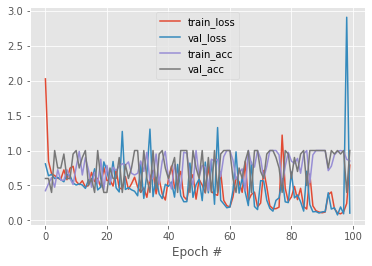

In [15]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [16]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
print(classification_report(y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=label_list))

              precision    recall  f1-score   support

      Pandan       1.00      0.60      0.75        20
      Pepaya       0.00      0.00      0.00         0

    accuracy                           0.60        20
   macro avg       0.50      0.30      0.37        20
weighted avg       1.00      0.60      0.75        20



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_wolf.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32)).flatten()
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
i = q_pred.argmax(axis=1)[0]
label = lb.classes_[i]

AttributeError: ignored

In [ ]:
text = "{}: {:.2f}%".format(label, q_pred[0][i] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose